In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost as XGB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve  # 画学习曲线的类
from sklearn.model_selection import ShuffleSplit  # 设定交叉验证模式的类
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

# 数据探索

In [2]:
data = pd.read_csv("./data/XGBoost实验-数据集/台湾气象数据/train.csv", encoding='big5')

In [3]:
data.head(18)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      4320 non-null   object
 1   測站      4320 non-null   object
 2   測項      4320 non-null   object
 3   0       4320 non-null   object
 4   1       4320 non-null   object
 5   2       4320 non-null   object
 6   3       4320 non-null   object
 7   4       4320 non-null   object
 8   5       4320 non-null   object
 9   6       4320 non-null   object
 10  7       4320 non-null   object
 11  8       4320 non-null   object
 12  9       4320 non-null   object
 13  10      4320 non-null   object
 14  11      4320 non-null   object
 15  12      4320 non-null   object
 16  13      4320 non-null   object
 17  14      4320 non-null   object
 18  15      4320 non-null   object
 19  16      4320 non-null   object
 20  17      4320 non-null   object
 21  18      4320 non-null   object
 22  19      4320 non-null   

train.csv 的资料 12 个月中，每个月取 20 天，每天 24 小时的资料(每小时资料有 18个 features)。

# 数据预处理

In [5]:
# 取数值部分
# 同时因为没有降雨记录为了NR，所以要替换为0
data = data.iloc[:, 3:]
data[data == "NR"] = 0
data = data.to_numpy()

In [6]:
data

array([['14', '14', '14', ..., '15', '15', '15'],
       ['1.8', '1.8', '1.8', ..., '1.8', '1.8', '1.8'],
       ['0.51', '0.41', '0.39', ..., '0.35', '0.36', '0.32'],
       ...,
       ['36', '55', '72', ..., '118', '100', '105'],
       ['1.9', '2.4', '1.9', ..., '1.5', '2', '2'],
       ['0.7', '0.8', '1.8', ..., '1.6', '1.8', '2']], dtype=object)

In [7]:
# 因为每个月只有20天，没有连着，所以每个月数据要分开
# 数据处理后结果：
# 每个月有18行
# 每行为24*20小时的一项指标的测量结果
month_data = {}
for month in range(12):
    sample = np.empty((18, 24*20))  # empty 速度更快
    for day in range(20):
        sample[:, day * 24: (day + 1) * 24] = data[18 *
                                                   (20 * month + day): 18 * (20 * month + day + 1), :]
    month_data[month] = sample

In [8]:
# 每行对应一个指标，每列对应一个月20天工20*24=480个小时
for i in month_data:
    print(np.shape(month_data[i]))

(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)
(18, 480)


In [9]:
# 每个月有480小时。
# 每9个小时的所有数据作为一个x，然后第10小时的pm2.5作为y

# 数据会重复使用，
# 比如1-9小时一个样本，2-10小时一个样本
# 最后9个小时的数据没法儿用，减9

data_num_per_m = 24*20-9  # 该项是每个月能产生多少条数据

In [10]:
x_data = np.empty((12*data_num_per_m, 18*9), dtype=float)
y_data = np.empty((12*data_num_per_m, 1), dtype=float)
for month in range(12):  # 12个月
    for day in range(20):  # 每个月20天
        for hour in range(24):  # 每天24小时
            if day == 19 and hour > 14:
                continue  # 第19天14小时后就无法凑齐10小时的数据，跳过
            x_data[month*data_num_per_m+day*24+hour] = month_data[month][:,
                                                                         day*24+hour:day*24+hour+9].flatten()
            y_data[month*data_num_per_m+day*24 +
                   hour] = month_data[month][9, [day*24+hour+9]]

In [11]:
np.shape(x_data), np.shape(y_data)

((5652, 162), (5652, 1))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2,random_state=42)

# 模型训练与调参

In [13]:
# 尝试训练模型
# 设置n_estimators为100
xgb1 = XGBRegressor(n_estimators=100)
xgb1.fit(x_train, y_train)
xgb1.score(x_test, y_test)

0.8510020627327308

In [14]:
xgb1.get_num_boosting_rounds()

100

In [15]:
xgb1.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [16]:
# 使用和上面一样的参数，查看dart
params2 = xgb1.get_params()

params2["booster"] = "gblinear"

xgb2 = XGBRegressor(**params2)
xgb2.fit(x_train, y_train)
xgb2.score(x_test, y_test)

[15:57:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.856034515725604

In [17]:
# 清洗一下参数：
params2_n = {'objective': 'reg:squarederror',
             'base_score': 0.5,
             'booster': 'gblinear',
             'learning_rate': 0.300000012,
             'n_jobs': 0,
             'random_state': 0,
             'reg_alpha': 0,
             'reg_lambda': 1,
             'scale_pos_weight': 1,
             'validate_parameters': 1,
             'verbosity': None}
xgb2 = XGBRegressor(**params2_n)
xgb2.fit(x_train, y_train)
xgb2.score(x_test, y_test)

0.8560168879778854

In [18]:
# 使用和上面一样的参数，查看bart
params3 = xgb1.get_params()

params3["booster"] = "dart"

xgb3 = XGBRegressor(**params3)
xgb3.fit(x_train, y_train)
xgb3.score(x_test, y_test)

0.8510020574719118

三个弱评估器选择

表现都差不多

先看看数据量对得分的影响

这里比较得分较高的linear和准备调参的gbtree

In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
# gblinear
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(learning_rate=0.3, booster="gblinear"), x_train, y_train, shuffle=True, cv=cv,
    random_state=42, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1)

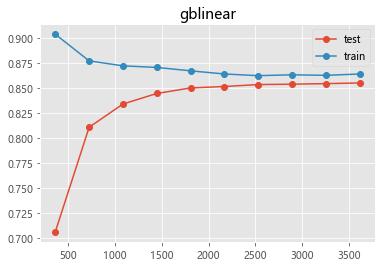

In [21]:
plt.title("gblinear")
plt.plot(train_sizes, test_scores.mean(axis=1), "o-", label="test")
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", label="train")
plt.legend()
plt.show()

数据越多，train得分变小，test得分变大。

最后得分接近为0.86

In [22]:
# gbtree
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(n_estimator=100), x_train, y_train, shuffle=True, cv=cv,
    random_state=42, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1)

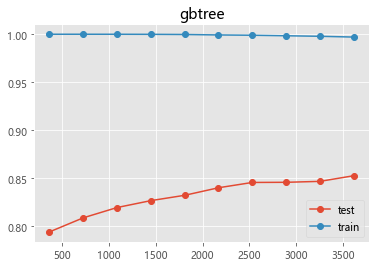

In [23]:
plt.title("gbtree")
plt.plot(train_sizes, test_scores.mean(axis=1), "o-", label="test")
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", label="train")
plt.legend()
plt.show()

数据越多，test的准确率越高

但是测试数train的准确率却略微下降

最后得分为0.85左右

因为gblinear一般效果都不太好，所以此处对得分较高的gbtree进行调参，看看得分是否有增大的空间

In [24]:
# 查看不同学习率对得分的影响

In [25]:
# 对n_estimators进行调参

range1 = range(1, 500, 50)
scores1 = list()
for i in range1:
    xgb = XGBRegressor(n_estimators=i)
    score = cross_val_score(xgb, x_train, y_train, cv=cv).mean()
    scores1.append(score)

在n_estimator 为 51 时
最大得分为：0.852905


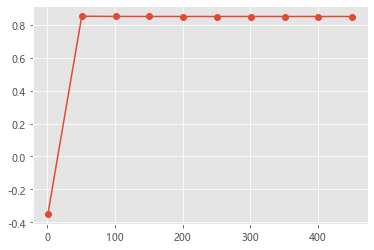

In [26]:
best_n_estimator = range1[scores1.index(np.max(scores1))]
print("在n_estimator 为 %d 时" % best_n_estimator)

print("最大得分为：%f" % (np.max(scores1)))

plt.plot(range1, scores1, '-o')
plt.show()

细化学习曲线,主要对0-50之间进行细化

In [27]:
range2 = range(best_n_estimator-35, best_n_estimator+5)
scores2 = list()
for i in range2:
    xgb = XGBRegressor(n_estimators=i)
    score = cross_val_score(xgb, x_train, y_train, cv=cv).mean()
    scores2.append(score)

在n_estimator 为 20 时
最大得分为：0.854811


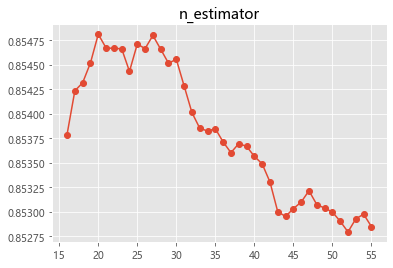

In [28]:
best_n_estimator = range2[scores2.index(np.max(scores2))]
print("在n_estimator 为 %d 时" % best_n_estimator)

print("最大得分为：%f" % (np.max(scores2)))

plt.title("n_estimator")
plt.plot(range2, scores2, '-o')
plt.show()

In [29]:
# 查找最好的学习率
param_grid = {
    "learning_rate": np.linspace(0.1, 1, 100)
}
xgb4 = XGBRegressor(
    n_estimators=best_n_estimator, random_state=42, n_jobs=-1)
GS = GridSearchCV(xgb4, param_grid, cv=cv, n_jobs=-1)  # 网格搜索
GS.fit(x_train, y_train)

GS.best_params_

{'learning_rate': 0.23636363636363636}

In [30]:
best_learing_rate = GS.best_params_["learning_rate"]

In [31]:
param_cv = {
    "eta": best_learing_rate
}
cv_result = XGB.cv(param_cv, XGB.DMatrix(x_train, y_train), 100, nfold=5)

In [32]:
cv_result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,20.871931,0.103643,20.948260,0.445572
1,16.453029,0.073468,16.677666,0.379232
2,13.137270,0.050851,13.481442,0.291887
3,10.661076,0.029663,11.188771,0.243340
4,8.828290,0.015582,9.578470,0.229569
...,...,...,...,...
95,1.353855,0.017116,6.330859,0.142975
96,1.343159,0.015660,6.331328,0.143083
97,1.324798,0.018787,6.332549,0.144266
98,1.308039,0.021215,6.333113,0.145687


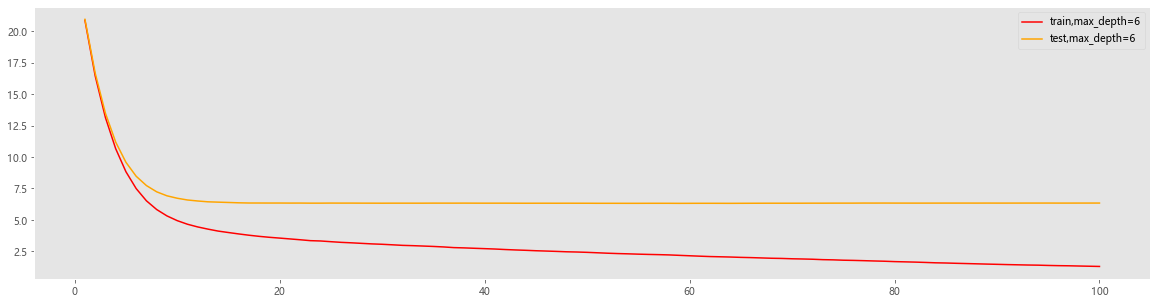

In [33]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(range(1, 101), cv_result.iloc[:, 0],
         c="red", label="train,max_depth=6")
plt.plot(range(1, 101), cv_result.iloc[:, 2],
         c="orange", label="test,max_depth=6")
plt.legend()
plt.show()

train的泛化误差一直下降，且与test的泛化误差拉开距离

有些过拟合

对 max_depth（默认为6） 进行调参，看看什么情况下test得分最高，以及泛化误差的变化

In [34]:
# 对 max_depth 进行调参
range3 = range(1, 10)
scores3 = list()
for i in range3:
    xgb = XGBRegressor(n_estimators=best_n_estimator,
                       max_depth=i, learning_rate=best_learing_rate)
    score = cross_val_score(xgb, x_train, y_train, cv=cv).mean()
    scores3.append(score)

在max_depth 为 4 时
最大得分为：0.859690


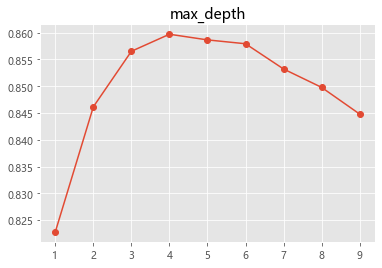

In [35]:
best_max_depth = range3[scores3.index(np.max(scores3))]
print("在max_depth 为 %d 时" % best_max_depth)

print("最大得分为：%f" % (np.max(scores3)))

plt.title("max_depth")
plt.plot(range3, scores3, '-o')
plt.show()

发现max_depth小些，准确性会提高

In [36]:
param_cv2 = {
    "eta": best_learing_rate,
    "max_depth": best_max_depth
}
cv_result2 = XGB.cv(param_cv2, XGB.DMatrix(x_train, y_train), 100, nfold=5)

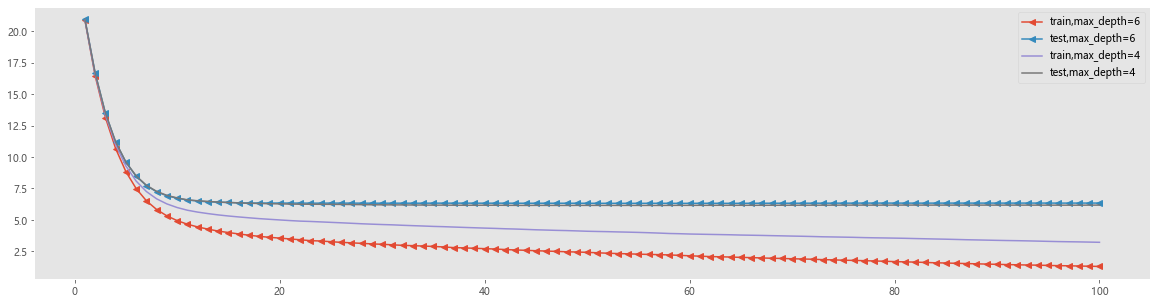

In [37]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(range(1, 101), cv_result.iloc[:, 0], '-<', label="train,max_depth=6")
plt.plot(range(1, 101), cv_result.iloc[:, 2], '-<', label="test,max_depth=6")
plt.plot(range(1, 101), cv_result2.iloc[:, 0], '-', label="train,max_depth=4")
plt.plot(range(1, 101), cv_result2.iloc[:, 2], '-', label="test,max_depth=4")
plt.legend()
plt.show()

test 的泛化误差相同，但是train泛化误差-test泛化误差，在max_depth=4时更小

可以认为过拟合程度较小，效果更好

In [38]:
print("n_estimator为：%f,\nlearning_rate为%f,\nmax_depth为%d" %
      (best_n_estimator, best_learing_rate, best_max_depth))

n_estimator为：20.000000,
learning_rate为0.236364,
max_depth为4


In [39]:
XGBRegressor(n_estimators=best_n_estimator, learning_rate=best_learing_rate,
             max_depth=best_max_depth).fit(x_train, y_train).score(x_test, y_test)

0.8591692585519757